# Bounding Velocities

Using the approach from 

    2015 - Ashrafizadeh et al - A Jacobian-free Newton–Krylov method for thermalhydraulics simulations

Eq. (41a) and (41b) from the article.

In [28]:
import numpy as np
def continuous_transition(x, x_threshold, y0, y1, smoothness):
    η = 0.5 * (1 + np.tanh( (x - x_threshold) / smoothness ))
    return (1 - η) * y0 + η * y1

In [31]:
import seaborn
import matplotlib .pyplot as plt
from ipywidgets import interact, widgets

α = np.linspace(0, 1, num=500)

@interact(
    U_G=(1.0, 10, 0.1),
    U_L=(1.0, 10, 0.1),
    α_min=widgets.FloatSlider(
        min=1e-5, 
        max=0.5, 
        value=0.25, 
        step=1e-5, 
        continuous_update=True,
        readout_format='.2e',
    ),
    smoothness=widgets.FloatSlider(
        min=1e-5, 
        max=1e-1, 
        value=1e-2, 
        step=1e-5, 
        continuous_update=True,
        readout_format='.2e',
    )
)
def plot_results(U_G=5, U_L=1, α_min=0.5, smoothness=1e-2):
    Umax = max(U_G, U_L)
    Umin = min(U_G, U_L)
    
    U = continuous_transition(x=α, x_threshold=α_min, y0=U_L, y1=U_G, smoothness=smoothness)
    plt.figure(figsize=(10,10))
    plt.plot(α, U)
    plt.xlim((-0.1, 1.1))

    plt.ylim((0.9*Umin, 1.1*Umax))
    plt.show()

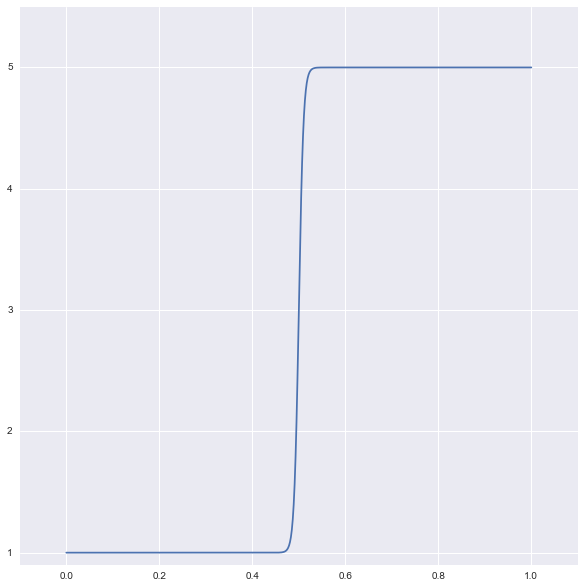

In [30]:
plot_results()